In [175]:
import torch
import torch.nn as nn
from torchvision import models
import matplotlib.pyplot  as plt

def double_conv(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True)
    )   


class UNetResNet34(nn.Module):

    def __init__(self, n_class):
        super().__init__()

        backbone = models.resnet34()

        self.down1 = nn.Sequential(
            backbone.conv1,
            backbone.bn1,
            backbone.relu
        )
        self.down2 = nn.Sequential(
            backbone.maxpool,
            backbone.layer1
        )
        self.down3 = backbone.layer2
        self.down4 = backbone.layer3
        self.down5 = backbone.layer4       

        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear')        

        self.up4 = double_conv(256 + 512, 256)
        self.up3 = double_conv(256 + 128, 128)
        self.up2 = double_conv(128 + 64, 64)
        self.up1 = double_conv(64 + 64, 64)

        self.final = nn.Conv2d(64, n_class, 1)

    def forward(self, x):
        d1 = self.down1(x)
        d2 = self.down2(d1)
        d3 = self.down3(d2)
        d4 = self.down4(d3)
        d5 = self.down5(d4)

        x = self.upsample(d5)        
        x = torch.cat([x, d4], dim=1)

        x = self.up4(x)
        x = self.upsample(x)        
        x = torch.cat([x, d3], dim=1)       

        x = self.up3(x)
        x = self.upsample(x)        
        x = torch.cat([x, d2], dim=1)

        x = self.up2(x)
        x = self.upsample(x)        
        x = torch.cat([x, d1], dim=1) 

        x = self.up1(x)

        return self.final(x)

In [176]:
import imageio

from torchvision import transforms

unet = UNetResNet34(n_class=1)
# <...> load weights
unet.eval()
resnet = models.resnet34(pretrained=True)
resnet.eval()

cat = imageio.imread("cat.jpg")
tensor = torch.stack([transforms.ToTensor()(cat)])

with torch.no_grad():
		# все работает
		resnet(tensor)
		
		# все ломается
		unet(tensor)

C:\Users\vetak\anaconda3\lib\site-packages\torch\nn\functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


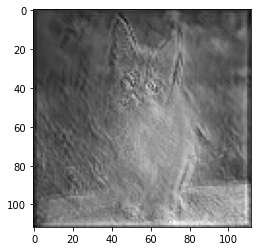

In [192]:
plt.imshow(unet(tensor)[0][0].detach().numpy(), cmap='gray')

In [190]:
unet(tensor)[0][0].detach().numpy()

C:\Users\vetak\anaconda3\lib\site-packages\torch\nn\functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


array([[0.03572759, 0.03531622, 0.03532292, ..., 0.03542748, 0.0342056 ,
        0.03288062],
       [0.03408906, 0.03417581, 0.03553038, ..., 0.03652268, 0.03467563,
        0.03284937],
       [0.03470418, 0.03396602, 0.03538569, ..., 0.03750419, 0.03464916,
        0.0318849 ],
       ...,
       [0.03282564, 0.03408621, 0.03773881, ..., 0.04969482, 0.04586105,
        0.04061782],
       [0.03427355, 0.03549131, 0.03597807, ..., 0.04552095, 0.04338779,
        0.04164667],
       [0.03075297, 0.03282048, 0.03511407, ..., 0.0385287 , 0.03787666,
        0.0403983 ]], dtype=float32)

In [191]:
unet(tensor)[0][0].detach().numpy().shape

C:\Users\vetak\anaconda3\lib\site-packages\torch\nn\functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


(112, 112)

In [193]:
import torch
import torch.nn as nn
from torchvision import models
import matplotlib.pyplot  as plt

def double_conv(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True)
    )   


class UNetResNet34(nn.Module):

    def __init__(self, n_class):
        super().__init__()

        backbone = models.resnet34()

        self.down1 = nn.Sequential(
            backbone.conv1,
            backbone.bn1,
            backbone.relu
        )
        self.down2 = nn.Sequential(
            backbone.maxpool,
            backbone.layer1
        )
        self.down3 = backbone.layer2
        self.down4 = backbone.layer3
        self.down5 = backbone.layer4       

        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear')        

        self.up4 = double_conv(256 + 512, 256)
        self.up3 = double_conv(256 + 128, 128)
        self.up2 = double_conv(128 + 64, 64)
        self.up1 = double_conv(64 + 64, 64)

        self.final = nn.Conv2d(64, n_class, 1)

    def forward(self, x):
        d1 = self.down1(x)
        d2 = self.down2(d1)
        d3 = self.down3(d2)
        d4 = self.down4(d3)
        d5 = self.down5(d4)

        x = self.upsample(d5)        
        x = torch.cat([x, d4], dim=1)

        x = self.up4(x)
        x = self.upsample(x)        
        x = torch.cat([x, d3], dim=1)       

        x = self.up3(x)
        x = self.upsample(x)        
        x = torch.cat([x, d2], dim=1)

        x = self.up2(x)
        x = self.upsample(x)        
        x = torch.cat([x, d1], dim=1) 

        x = self.up1(x)

        return self.final(x)

In [207]:
import imageio

from torchvision import transforms

unet = UNetResNet34(n_class=1)
# <...> load weights
unet.eval()
resnet = models.resnet34(pretrained=True)
resnet.eval()
resize = transforms.Compose([transforms.Scale((224,224))])
cat = imageio.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/8/89/Zunge_raus.JPG/300px-Zunge_raus.JPG")
tensor = torch.stack([transforms.ToTensor()(cat)])
tensor = resize(tensor)
with torch.no_grad():
		# все работает
		resnet(tensor)
		
		# все ломается
		unet(tensor)

C:\Users\vetak\anaconda3\lib\site-packages\torchvision\transforms\transforms.py:317: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +
C:\Users\vetak\anaconda3\lib\site-packages\torch\nn\functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


C:\Users\vetak\anaconda3\lib\site-packages\torch\nn\functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


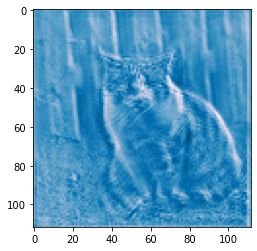

In [212]:
plt.imshow(unet(tensor)[0][0].detach().numpy(), cmap='PuBu')

In [204]:
p(tensor).shape

torch.Size([1, 3, 224, 224])

In [ ]:
https://static.probusiness.io/720x480c/n/03/d/38097027_439276526579800_2735888197547458560_n.jpg